### Pohlepni algoritam (BFS)

In [2]:
import codecs
import time
import operator

def parse_dimacs_to_list(graph_file_name):
    
    graph_list = []
    dim = 0

    with codecs.open(graph_file_name, encoding='ascii') as graph_text:
    
        for line in graph_text:
            if line.startswith('e'):
                line = line[:-2]  
                line = line.split(' ')
                del line[0]    
                int_list = list(map(int,line))
                dim = max(dim, int(int_list[0]), int(int_list[1]))

        print('Dimenzija: ',dim)

        for i in range(0,dim+1):
            graph_list.append([])
        

    #popunjavanje liste
    with codecs.open(graph_file_name, encoding='ascii') as graph_text:        

        for line in graph_text:
            if line.startswith('e'):
                #print(line)
                line = line[:-2]  
                line = line.split(' ')
                del line[0]    
                int_list = list(map(int,line))
                #print(int_list)
                #print(int_list[0],int_list[1])
                graph_list[int_list[0]].append(int_list[1])
                graph_list[int_list[1]].append(int_list[0])
                #print(graph_list)


    return graph_list


In [3]:
def transpose(graph):
    for n, i in enumerate(graph):
        for m, j in enumerate(i):
            graph[n][m] = j - 1

In [4]:
graph0 = [[3],[3],[3],[0,1,2,4],[3,5,6,7],[4],[4],[4]]

#mali (4)
graph1 = parse_dimacs_to_list('graph1.txt')
graph1.pop(0) 
transpose(graph1)
#print(graph1)

#srednji (6)
graph2 = parse_dimacs_to_list('graph2.txt')
graph2.pop(0) 
transpose(graph2)
#print(graph2)

#srednje boja mnogo cvorova (20)
graph3 = parse_dimacs_to_list('graph3.txt')
graph3.pop(0) 
transpose(graph3)
#print(graph3)

#mnogo boja mnogo cvorova  (42)
graph4 = parse_dimacs_to_list('graph4.txt')
graph4.pop(0) 
transpose(graph4)
#print(graph4)

#mnogo covrova malo boja (8)
graph5 = parse_dimacs_to_list('graph5.txt')
graph5.pop(0) 
transpose(graph5)
#print(graph5)

#mnogo cvorova malo grana (9)
graph6 = parse_dimacs_to_list('graph6.txt')
graph6.pop(0) 
transpose(graph6)
#print(graph6)

Dimenzija:  11
Dimenzija:  47
Dimenzija:  128
Dimenzija:  128
Dimenzija:  95
Dimenzija:  120


In [5]:
def bfs(graph, root):
  
    visited = [root]
    queue = [root]
  
    color_dict = [-1 for i in range(len(graph))]

    while queue:
    
        s = queue.pop(0)


        #ovo moze lepse vrv
        not_satisfied = True
        color = 1

      

        adj = list(map(lambda x : color_dict[x], graph[s]))
        #print ('adj:',adj, end = '\n')
        while not_satisfied:
            if color not in adj:
                color_dict[s] = color
                not_satisfied = False
            else: 
                color = color + 1
      
        for neighbour in graph[s]:
            if neighbour not in visited:
                visited.append(neighbour)
                queue.append(neighbour)

    return color_dict


#color_dict = bfs(graph3,1)
#print(color_dict)

In [6]:
def adapt_and_sum_colors(colors):
    
    #mapiramo boja:'broj ponavljanja te boje'
    color_dict={}
    for color in colors:
        if color not in color_dict:
            color_dict.update( {color : 1} )
        else:
            color_dict[color] = color_dict[color] + 1
            
    temp_dict = sorted(color_dict.items(), key=operator.itemgetter(0))
    color_dict = {k: v for k, v in temp_dict}
    
    
    color_sum = 0
    for k in color_dict:
        color_sum = color_sum + k * color_dict[k]

    
    #sortiramo prema vrednostima
    sorted_tuples = sorted(color_dict.items(), key=operator.itemgetter(1), reverse=True)
    sorted_dict = {k: v for k, v in sorted_tuples}

    
    
    #ukrstimo tako da boja 1 ima najvise ponavljanja itd...
    for k1,k2 in zip(color_dict, sorted_dict):
        color_dict[k1] = sorted_dict[k2]

  
    color_sum = 0
    for k in color_dict:
        color_sum = color_sum + k * color_dict[k]
 
    
    return color_sum
  

graph0
Sec: 4.1300000020783045e-05
Unique colors: 2
Sum before: 12
Sum after: 12

graph1
Sec: 4.73000000056345e-05
Unique colors: 4
Sum before: 22
Sum after: 22

graph2
Sec: 0.0003063000000338434
Unique colors: 6
Sum before: 104
Sum after: 104

graph3
Sec: 0.0051801000000182285
Unique colors: 21
Sum before: 809
Sum after: 800

graph4
Sec: 0.013441000000000258
Unique colors: 46
Sum before: 1975
Sum after: 1944

graph5
Sec: 0.0016636000000289641
Unique colors: 7
Sum before: 215
Sum after: 215

graph6
Sec: 0.003073500000027707
Unique colors: 9
Sum before: 483
Sum after: 483

graph0
Sec: 3.659999998717467e-05
Unique colors: 2
Sum before: 12
Sum after: 12

graph1
Sec: 4.580000000942164e-05
Unique colors: 4
Sum before: 22
Sum after: 22

graph2
Sec: 0.0003247999999871354
Unique colors: 6
Sum before: 104
Sum after: 104

graph3
Sec: 0.003934399999991456
Unique colors: 20
Sum before: 789
Sum after: 784

graph4
Sec: 0.011619599999960428
Unique colors: 43
Sum before: 2028
Sum after: 1929

graph5
S

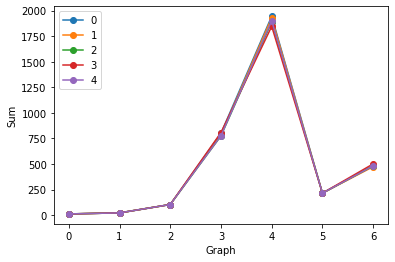

In [12]:
graph_names = ['graph0', 'graph1', 'graph2', 'graph3', 'graph4', 'graph5', 'graph6']
graph_list = [graph0, graph1, graph2, graph3, graph4, graph5, graph6]
unique_colors = []
sum_list = []
compare_list = []

for root in [0, 1, 2, 3, 4]:
    for graph, name in zip(graph_list, graph_names):

        start = time.perf_counter()
        solution = bfs(graph, root)
        color_sum = adapt_and_sum_colors(solution)
        end = time.perf_counter()
        unique_colors.append(len(set(solution)))
        timeExec = end - start
        sum_list.append(color_sum)
        
        print(name)
        print('Sec: ' + str(timeExec))
        print('Unique colors: ' + str(len(set(solution))))
        print('Sum before: ' + str(sum(solution)))
        print('Sum after: ' + str(color_sum))
        print()
    
    plt.plot([0,1,2,3,4,5,6], sum_list, '-o',label=root)
    plt.legend(loc='upper left')
    compare_list.append([sum_list])
    sum_list = []
plt.xlabel("Graph")
plt.ylabel("Sum")
plt.savefig('greedy.png')
plt.show()    

    

In [8]:
import matplotlib.pyplot as plt
import numpy as np

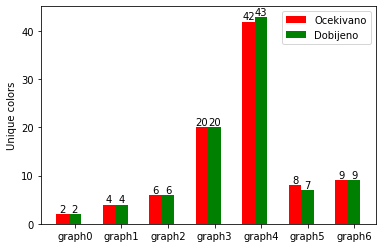

In [22]:
N = 7
ind = np.arange(N)
width = 0.27 

fig = plt.figure()
ax = fig.add_subplot()

yvals = [2,4,6,20,42,8,9]
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = unique_colors
rects2 = ax.bar(ind+width, zvals, width, color='g')

ax.set_ylabel('Unique colors')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('graph0', 'graph1', 'graph2', 'graph3', 'graph4', 'graph5', 'graph6') )
ax.legend( (rects1[0], rects2[0]), ('Ocekivano', 'Dobijeno') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)


plt.show()